# Assignment 2.1: Module 2 Exercise Questions 
Mirna Philip
* Introduction to Data Mining: Exercises 3.11 – Page 186: Question #3
  Hint: Question #3 should be completed by hand.  
* Data Science Using Python and R: Chapter 4 - Page 64: Questions #21, 22, 23, 24, & 25
  Use both R and Python for these questions.
* Data Science Using Python and R: Chapter 6 - Page 93: Questions #14, 15, 16, & 17
  Use both R and Python for these questions.
* Data Science Using Python and R: Chapter 11 - Page 165: Questions #34, 35, 36, 37, 38, 39, 40, & 41
  Use both R and Python for these questions.

# Introduction to Data Mining: Exercises 3.11.
### (a) Compute the Gini index for the overall collection of training examples.
* Answer: Gini = 1−2×0.52 = 0.5
### (b) Compute the Gini index for the Customer ID attribute.
* Answer: Since, Customer ID is shared equally the Gini index is 0 
### (c) Compute the Gini index for the Gender attribute.
* Answer: Proportion of males = 10/20 = 0.5, Proportion of females = 0.5. So, overall gini for Gender is 0.5 
### (d) Compute the Gini index for the Car Type attribute using multiway split.
* Answer: Overall Gini index = (0.2424 * 0.2) + (0.3255 * 0.4) + (0.3255 * 0.4) = 0.1625
### (e) Compute the Gini index for the Shirt Size attribute using multiway split.
* Answer: Gini index = (0.274 * 0.25) + (0.313 * 0.35) + (0.2424 * 0.2) + (0.2424 * 0.2) = 0.4914
### (f) Which attribute is better, Gender, Car Type, or Shirt Size?
* Car Type because it has the lowest gini among the rest.
### (g) Explain why Customer ID should not be used as the attribute test condition even though it has the lowest Gini.
* The attribute cannot be used for prediction purposes as new customers are assigned unique Customer IDs.

In [1]:
%load_ext rpy2.ipython

/Users/mirnaphilip/opt/anaconda3/envs/MIRNA/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:17: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex


# Chapter 4




In [2]:
%%R
df <- read.csv("bank_marketing_training.csv")
head(df)

  age         job  marital   education default housing loan   contact month
1  56   housemaid  married    basic.4y      no      no   no telephone   may
2  57    services  married high.school unknown      no   no telephone   may
3  41 blue-collar  married     unknown unknown      no   no telephone   may
4  25    services   single high.school      no     yes   no telephone   may
5  29 blue-collar   single high.school      no      no  yes telephone   may
6  57   housemaid divorced    basic.4y      no     yes   no telephone   may
  day_of_week duration campaign days_since_previous previous previous_outcome
1         mon      261        1                 999        0      nonexistent
2         mon      149        1                 999        0      nonexistent
3         mon      217        1                 999        0      nonexistent
4         mon      222        1                 999        0      nonexistent
5         mon      137        1                 999        0      nonexistent


In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import statsmodels.tools.tools as stattools
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm


df= pd.read_csv("bank_marketing_training.csv")
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,days_since_previous,previous,previous_outcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,29,blue-collar,single,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


# 21. Produce the following graphs. What is the strength of each graph? Weakness? 
* a. Bar graph of marital. 
* b. Bar graph of marital, with overlay of response. 
* c. Normalized bar graph of marital, with overlay of response. 


/Users/mirnaphilip/opt/anaconda3/envs/MIRNA/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

  warnings.warn(x, RRuntimeWarning)


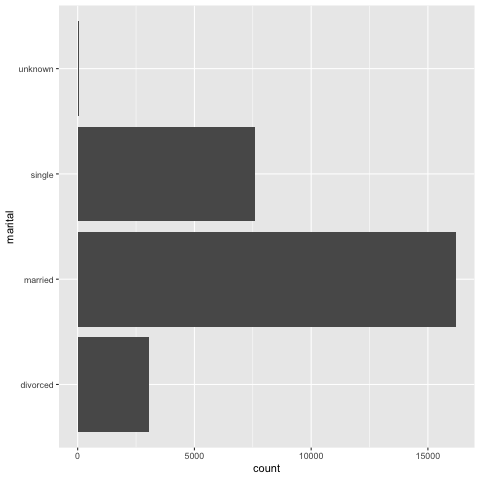

In [4]:
%%R
library(ggplot2)
# a. Bar graph of marital. 
#The count of status
#Counts <- table(df$marital)
# graphing bar 
#barplot(Counts, main='Marital Status', xlab='Status', ylab='Count')
ggplot(df, aes(x = marital)) +geom_bar() +coord_flip()

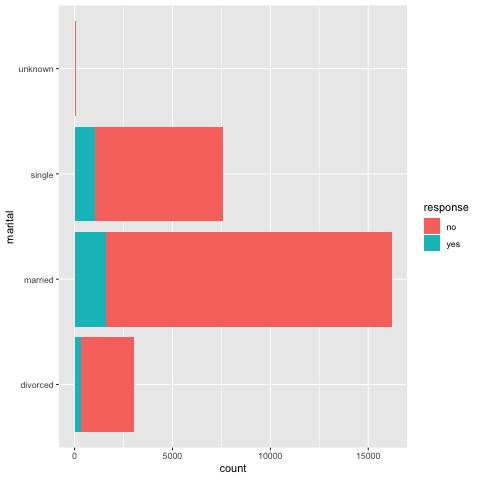

In [5]:
%%R
#Bar graph of marital, with overlay of response. 
ggplot(df, aes(marital)) + geom_bar(aes(fill = response)) + coord_flip()

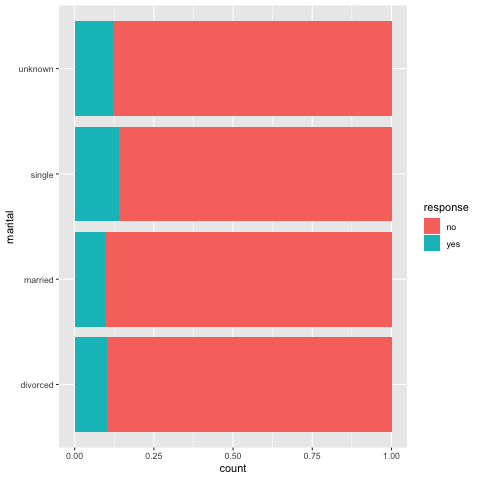

In [6]:
%%R
#Normalized bar graph of marital, with overlay of response.
library(ggplot2)
ggplot(df, aes(marital)) + geom_bar(aes(fill = response),position = "fill") + coord_flip()


<AxesSubplot:>

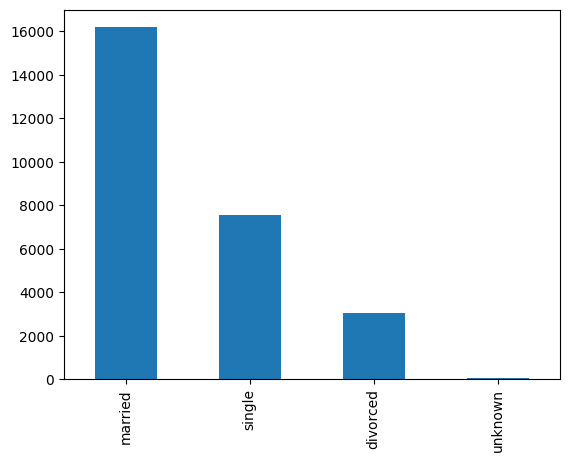

In [7]:
#a. Bar graph of marital. 
# the count of each status 
MS= df.marital.value_counts()
#ploting 
MS.plot.bar(x='marital' ,y= MS)


<AxesSubplot:xlabel='marital'>

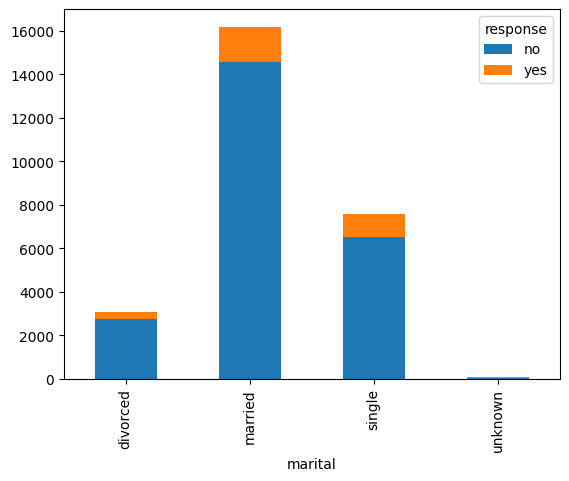

In [8]:
#Bar graph of marital, with overlay of response. 
crosstab_01 = pd.crosstab(df['marital'], df['response'])
crosstab_01.plot(kind='bar', stacked = True)

<AxesSubplot:xlabel='marital'>

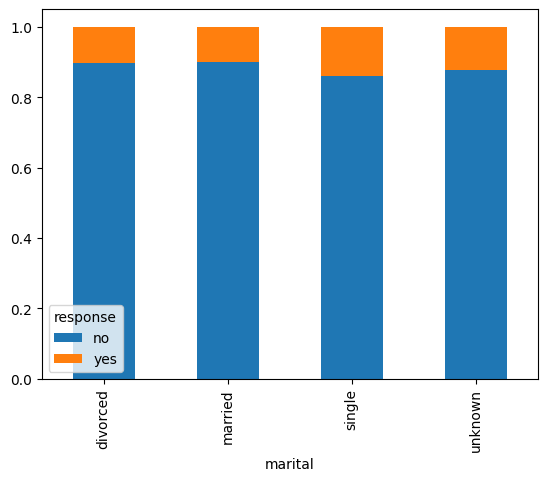

In [9]:
#Normalized bar graph of marital, with overlay of response.
crosstab_norm = crosstab_01.div(crosstab_01.sum(1),axis = 0)
crosstab_norm.plot(kind='bar', stacked = True)

# 22. Using the graph from Exercise 21c, describe the relationship between marital and response. 


##### Answer: Using the graph from Exercise 21C, normalized graph helped me compare the marital and response  proportions variables within categories and can be useful for identifying relationships between variables where I notice that there are more no's then yes in each status of marital. 

In [10]:
counts = df.groupby(['marital', 'response']).size()
norm_counts = counts / counts.groupby(level=0).sum()
norm_counts

marital   response
divorced  no          0.897872
          yes         0.102128
married   no          0.900661
          yes         0.099339
single    no          0.859934
          yes         0.140066
unknown   no          0.877193
          yes         0.122807
dtype: float64

# 23. Do the following with the variables marital and response. 
* a. Build a contingency table, being careful to have the correct variables representing the rows and columns. Report the counts and the column percentages. 
* b. Describe what the contingency table is telling you.
# b. Describe what the contingency table is telling you.
###### The contingency table is telling me that majory of the responses were no for Marital status.


In [11]:

#Build a contingency table, being careful to have the correct variables representing the rows and columns. Report the counts and the column percentages. 
Table = pd.crosstab(df['response'], df['marital'])
Table
#round(crosstab_02.div(crosstab_02.sum(0), axis = 1)*100, 1)

marital,divorced,married,single,unknown
response,,,,
no,2743,14579,6514,50
yes,312,1608,1061,7


In [12]:
%%R 
#creating the table of contingcy 
Table <- table(df$response, df$marital)
Table
#rounding up to the 10th place 
#round(prop.table(Table, margin = 2)*100, 1)


     
      divorced married single unknown
  no      2743   14579   6514      50
  yes      312    1608   1061       7


# 24. Repeat the previous exercise, this time reporting the row percentages. Explain the difference between the interpretation of this table and the previous contingency table. # 

## ANSWER: 
    the difference between the interpretation of this table and the previous contingency table are that the tables belows are the percentage of responese of each marital where the previous one were the count of respones of each maritals that's what makes these two contingency table different.

In [13]:
round(Table.div(Table.sum(0), axis = 1)*100, 0)

marital,divorced,married,single,unknown
response,,,,
no,90.0,90.0,86.0,88.0
yes,10.0,10.0,14.0,12.0


In [14]:
%%R
round(prop.table(Table, margin = 2)*100, 0)

     
      divorced married single unknown
  no        90      90     86      88
  yes       10      10     14      12


# 25. Produce the following graphs. What is the strength of each graph? Weakness? 
* a. Histogram of duration. 
* b. Histogram of duration, with overlay of response. 
* c. Normalized histogram of duration, with overlay of response.


array([[<AxesSubplot:title={'center':'duration'}>]], dtype=object)

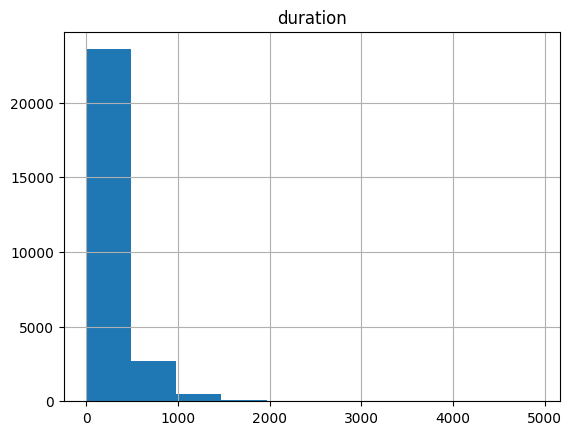

In [15]:
#graphing a histogram of duration 
df.hist(column= 'duration')

In [16]:
#separeting yes and no responce so we can graph hist
yes = df[df.response == "yes"]['duration']
no = df[df.response == "no"]['duration']

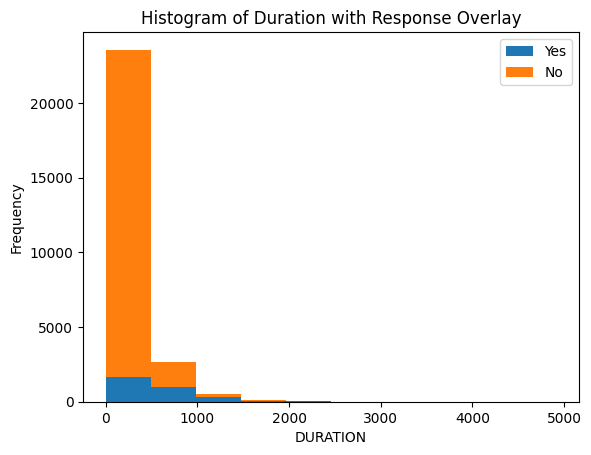

In [17]:
# graphing hist 
(n, bins, patches ) = plt.hist([yes, no], bins = 10, stacked = True)
plt.legend(['Yes', 'No'])
plt.title('Histogram of Duration with Response Overlay')
plt.xlabel('DURATION'); 
plt.ylabel('Frequency'); 
plt.show()

In [18]:
n_table = np.column_stack((n[0], n[1]))
n_norm = n_table / n_table.sum(axis=1)[:, None]
ourbins = np.column_stack((bins[0:10], bins[1:11]))

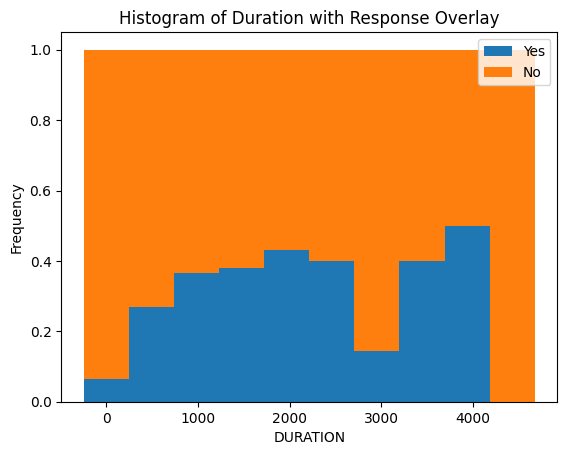

In [19]:
p1 = plt.bar(x = ourbins[:,0], height = n_norm[:,0], width = ourbins[:,1] - ourbins[:, 0])
p2 = plt.bar(x = ourbins[:,0], height = n_norm[:,1],width = ourbins[:,1]- ourbins[:, 0],bottom = n_norm[:,0])
plt.legend(['Yes', 'No'])
plt.title('Histogram of Duration with Response Overlay')
plt.xlabel('DURATION'); 
plt.ylabel('Frequency'); 
plt.show()

/Users/mirnaphilip/opt/anaconda3/envs/MIRNA/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

  warnings.warn(x, RRuntimeWarning)


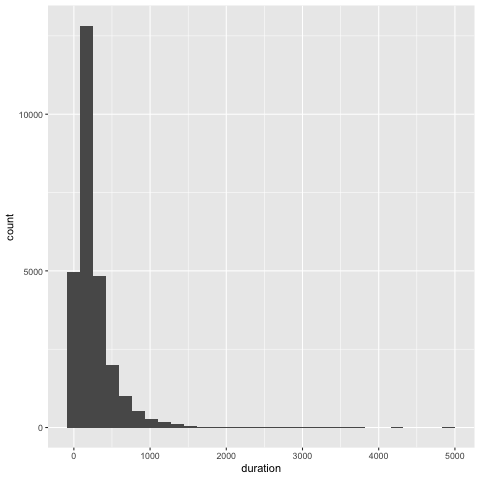

In [20]:
%%R
library(ggplot2)
#graphing hist
ggplot(df, aes(duration)) + geom_histogram()

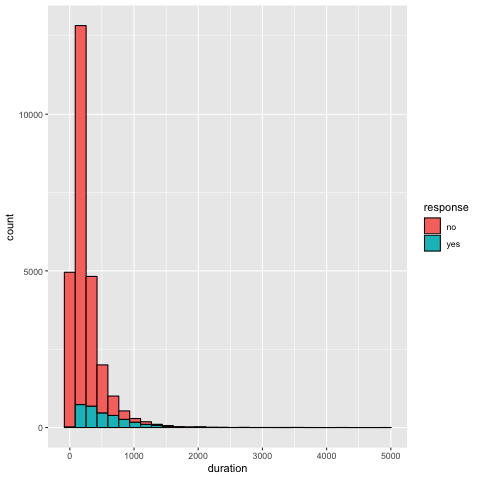

In [21]:
%%R
library(ggplot2)
#graphing overlay
ggplot(df, aes(duration)) + geom_histogram(aes(fill =response), color="black")

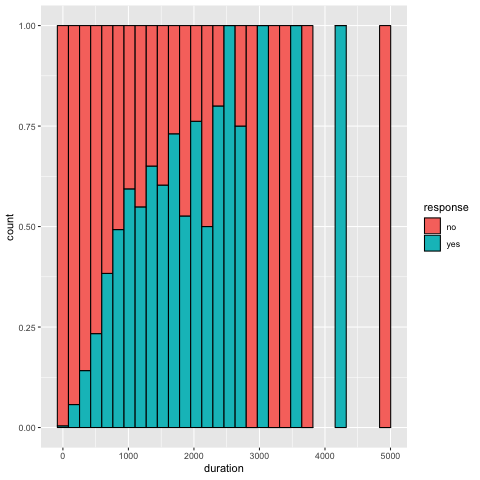

In [22]:
%%R
library(ggplot2)
#normalized hist of duration with response 
ggplot(df, aes(duration)) +geom_histogram(aes(fill = response), color="black",position = "fill")

### PAGE 93
14. Create a CART model using the training data set that predicts income using marital status and capital gains and losses. Visualize the decision tree (that is, provide the decision tree output). Describe the first few splits in the decision tree.
15. Develop a CART model using the test data set that utilizes the same target and predictor variables. Visualize the decision tree. Compare the decision trees. Does the test data result match the training data result?
16. Use the training data set to build a C5.0 model to predict income using marital status and capital gains and losses. Specify a minimum of 75 cases per terminal node. Visualize the decision tree. Describe the first few splits in the decision tree.
17. How does your C5.0 model compare to the CART model? Describe the similarities and differences.

In [23]:
df=pd.read_csv('adult_ch6_test.csv')
dft=pd.read_csv('adult_ch6_training.csv')



14. Create a CART model using the training data set that predicts income using marital status and capital gains and losses. Visualize the decision tree (that is, provide the decision tree output). Describe the first few splits in the decision tree.


In [24]:
y = dft[['Income']]
mar_np = np.array(dft['Marital status'])
(mar_cat, mar_cat_dict) = stattools.categorical(mar_np,drop=True, dictnames = True)
#Marital status into an array using array(), then use the categorical() command from the stattools package to create a matrix of dummy variables for each value of Marital status. We save the matrix and dictionary separately using (mar_cat, mar_cat_dict).
mar_cat_pd = pd.DataFrame(mar_cat)
X = pd.concat((dft[['Cap_Gains_Losses']], mar_cat_pd), axis = 1)
print(X)

       Cap_Gains_Losses    0    1    2    3    4
0               0.02174  0.0  0.0  1.0  0.0  0.0
1               0.00000  1.0  0.0  0.0  0.0  0.0
2               0.00000  0.0  1.0  0.0  0.0  0.0
3               0.00000  0.0  1.0  0.0  0.0  0.0
4               0.00000  0.0  1.0  0.0  0.0  0.0
...                 ...  ...  ...  ...  ...  ...
18756           0.00000  1.0  0.0  0.0  0.0  0.0
18757           0.00000  0.0  1.0  0.0  0.0  0.0
18758           0.00000  0.0  1.0  0.0  0.0  0.0
18759           0.00000  1.0  0.0  0.0  0.0  0.0
18760           0.00000  0.0  1.0  0.0  0.0  0.0

[18761 rows x 6 columns]


/Users/mirnaphilip/opt/anaconda3/envs/MIRNA/lib/python3.7/site-packages/statsmodels/tools/tools.py:156: FutureWarning: categorical is deprecated. Use pandas Categorical to represent categorical data and can get_dummies to construct dummy arrays. It will be removed after release 0.13.
  FutureWarning


In [25]:
X_names = ["Cap_Gains_Losses", "Divorced", "Married","Never-married", "Separated", "Widowed"]
y_names = ["<=50K", ">50K"]
cart01 = DecisionTreeClassifier(criterion = "gini", max_leaf_nodes=5).fit(X,y)
#Now, we are ready to run the CART algorithm!
export_graphviz(cart01, out_file = "cart01.dot",feature_names=X_names, class_names=y_names)


/Users/mirnaphilip/opt/anaconda3/envs/MIRNA/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


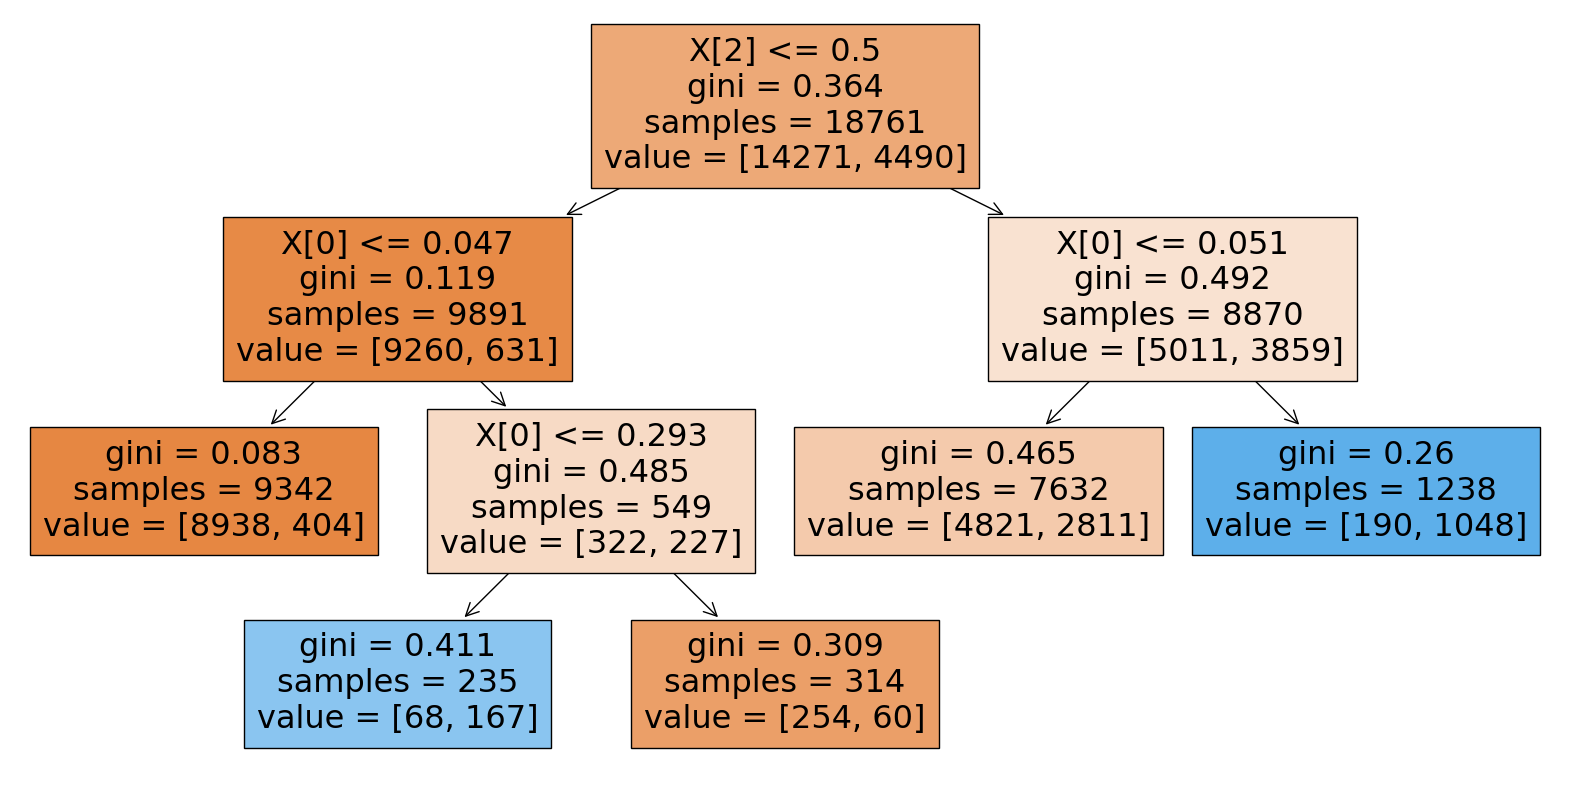

In [26]:
#Visualize the decision tree using the plot_tree function:
plt.figure(figsize=(20,10))
plot_tree(cart01, filled=True)
plt.show()

In [27]:
%%R 
df<- read.csv("adult_ch6_test.csv")
dft<- read.csv("adult_ch6_training.csv")


In [28]:
%%R
colnames(dft)[1] <- "maritalStatus"


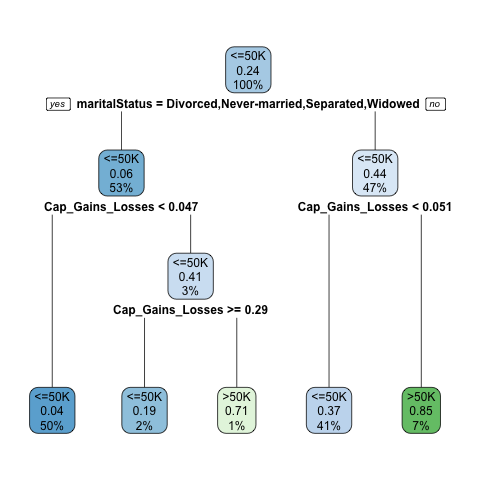

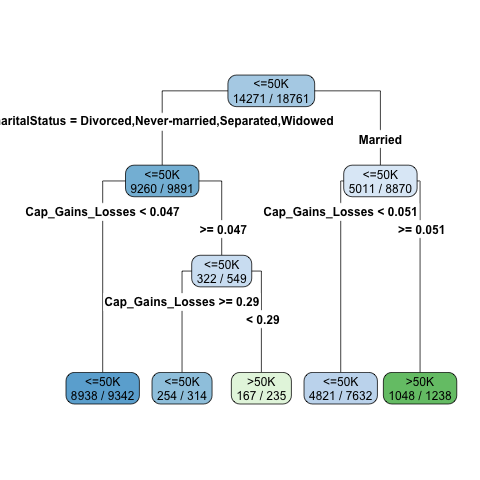

In [29]:
%%R
library(rpart);
library(rpart.plot)
cart01 <- rpart(formula = Income ~ maritalStatus + Cap_Gains_Losses,data = dft, method = "class")
rpart.plot(cart01)
rpart.plot(cart01, type = 4, extra = 2)

# 15. Develop a CART model using the test data set that utilizes the same target and predictor variables. Visualize the decision tree. Compare the decision trees. Does the test data result match the training data result?
## Answer: after comparing the two decision trees i notice that the test data and training data result were not matching.

In [30]:
y = df[['Income']]
mar_np = np.array(df['Marital status'])
(mar_cat, mar_cat_dict) = stattools.categorical(mar_np,drop=True, dictnames = True)
#Marital status into an array using array(), then use the categorical() command from the stattools package to create a matrix of dummy variables for each value of Marital status. We save the matrix and dictionary separately using (mar_cat, mar_cat_dict).
mar_cat_pd = pd.DataFrame(mar_cat)
X = pd.concat((df[['Cap_Gains_Losses']], mar_cat_pd), axis = 1)
print(X)

      Cap_Gains_Losses    0    1    2    3    4
0             0.000000  0.0  1.0  0.0  0.0  0.0
1             0.051781  0.0  1.0  0.0  0.0  0.0
2             0.000000  0.0  0.0  1.0  0.0  0.0
3             0.000000  1.0  0.0  0.0  0.0  0.0
4             0.000000  0.0  1.0  0.0  0.0  0.0
...                ...  ...  ...  ...  ...  ...
6150          0.000000  0.0  1.0  0.0  0.0  0.0
6151          0.000000  0.0  0.0  1.0  0.0  0.0
6152          0.000000  1.0  0.0  0.0  0.0  0.0
6153          0.000000  0.0  0.0  1.0  0.0  0.0
6154          0.000000  0.0  1.0  0.0  0.0  0.0

[6155 rows x 6 columns]


/Users/mirnaphilip/opt/anaconda3/envs/MIRNA/lib/python3.7/site-packages/statsmodels/tools/tools.py:156: FutureWarning: categorical is deprecated. Use pandas Categorical to represent categorical data and can get_dummies to construct dummy arrays. It will be removed after release 0.13.
  FutureWarning


In [31]:
X_names = ["Cap_Gains_Losses", "Divorced", "Married","Never-married", "Separated", "Widowed"]
y_names = ["<=50K", ">50K"]
cart01 = DecisionTreeClassifier(criterion = "gini", max_leaf_nodes=5).fit(X,y)
#Now, we are ready to run the CART algorithm!
export_graphviz(cart01, out_file = "cart01.dot",feature_names=X_names, class_names=y_names)

/Users/mirnaphilip/opt/anaconda3/envs/MIRNA/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


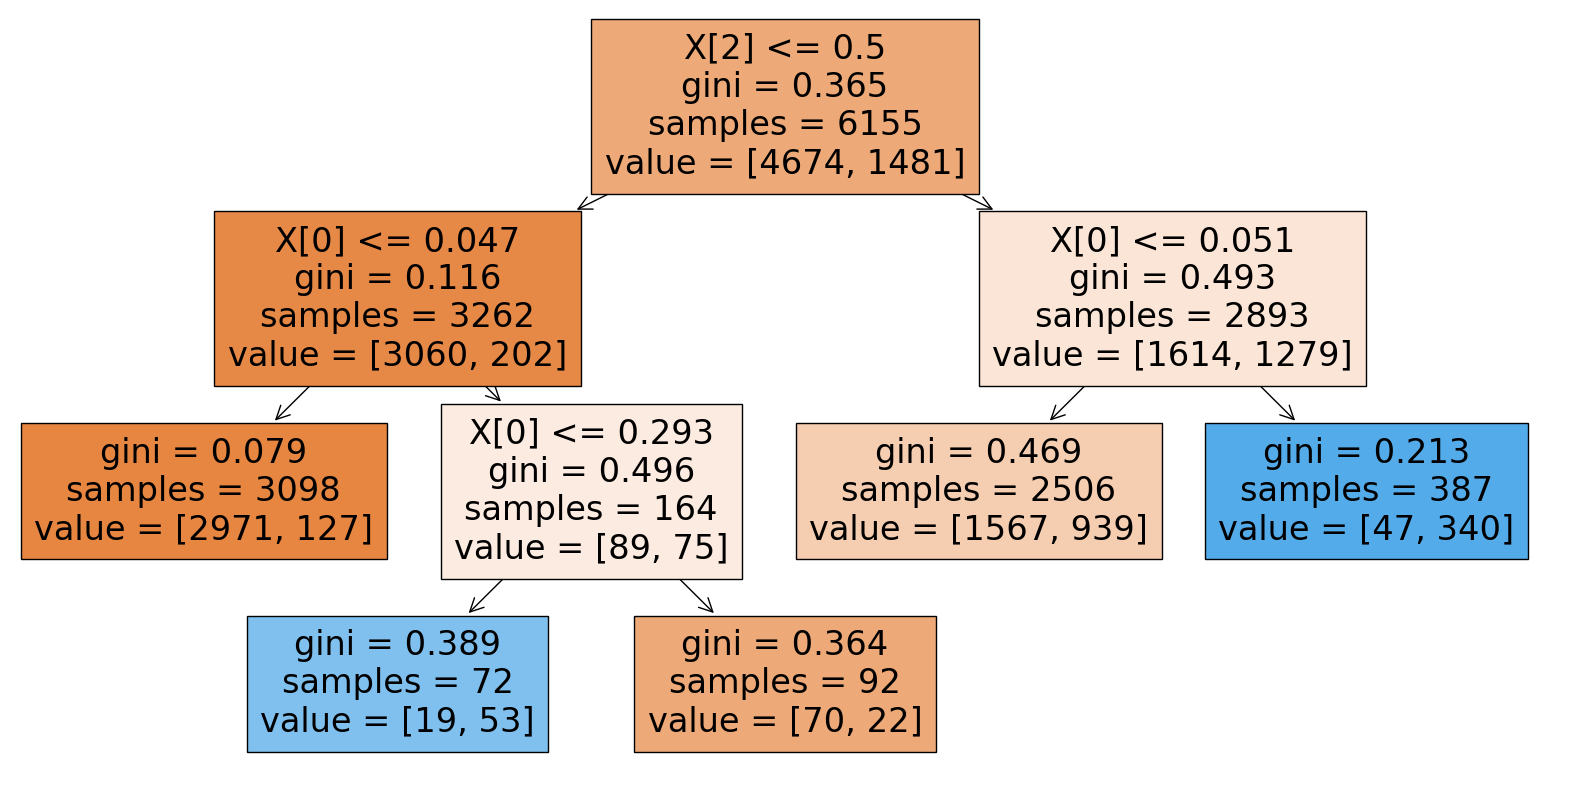

In [32]:
#Visualize the decision tree using the plot_tree function:
plt.figure(figsize=(20,10))
plot_tree(cart01, filled=True)
plt.show()

In [33]:
%%R
colnames(df)[1] <- "maritalStatus"
head(df)

  maritalStatus Income Cap_Gains_Losses
1       Married  <=50K         0.000000
2       Married   >50K         0.051781
3 Never-married  <=50K         0.000000
4      Divorced   >50K         0.000000
5       Married   >50K         0.000000
6       Married  <=50K         0.000000


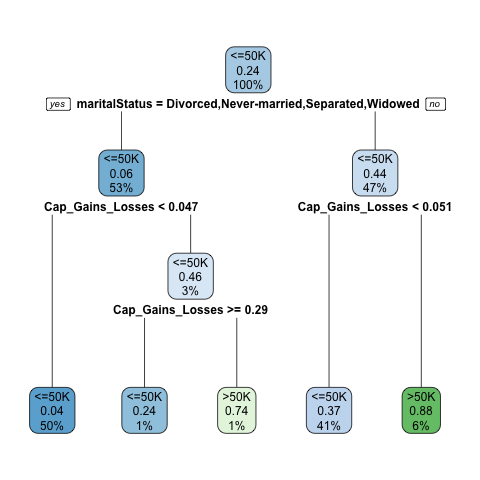

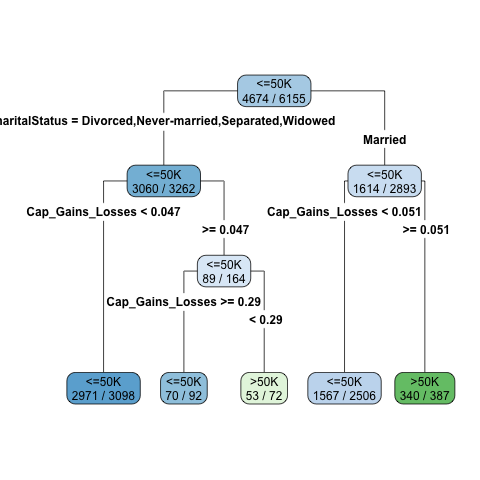

In [34]:
%%R
library(rpart);
library(rpart.plot)

cart01 <- rpart(formula = Income ~ maritalStatus + Cap_Gains_Losses,data = df, method = "class")
rpart.plot(cart01)

rpart.plot(cart01, type = 4, extra = 2)


16. Use the training data set to build a C5.0 model to predict income using marital status and capital gains and losses. Specify a minimum of 75 cases per terminal node. Visualize the decision tree. Describe the first few splits in the decision tree.

In [35]:
c50_01 = DecisionTreeClassifier(criterion="entropy",max_leaf_nodes=5).fit(X,y)
export_graphviz(c50_01, out_file ="c50_01.dot" ,feature_names=X_names, class_names=y_names)
c50_01.predict(X)

/Users/mirnaphilip/opt/anaconda3/envs/MIRNA/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/Users/mirnaphilip/opt/anaconda3/envs/MIRNA/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


array(['<=50K', '>50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

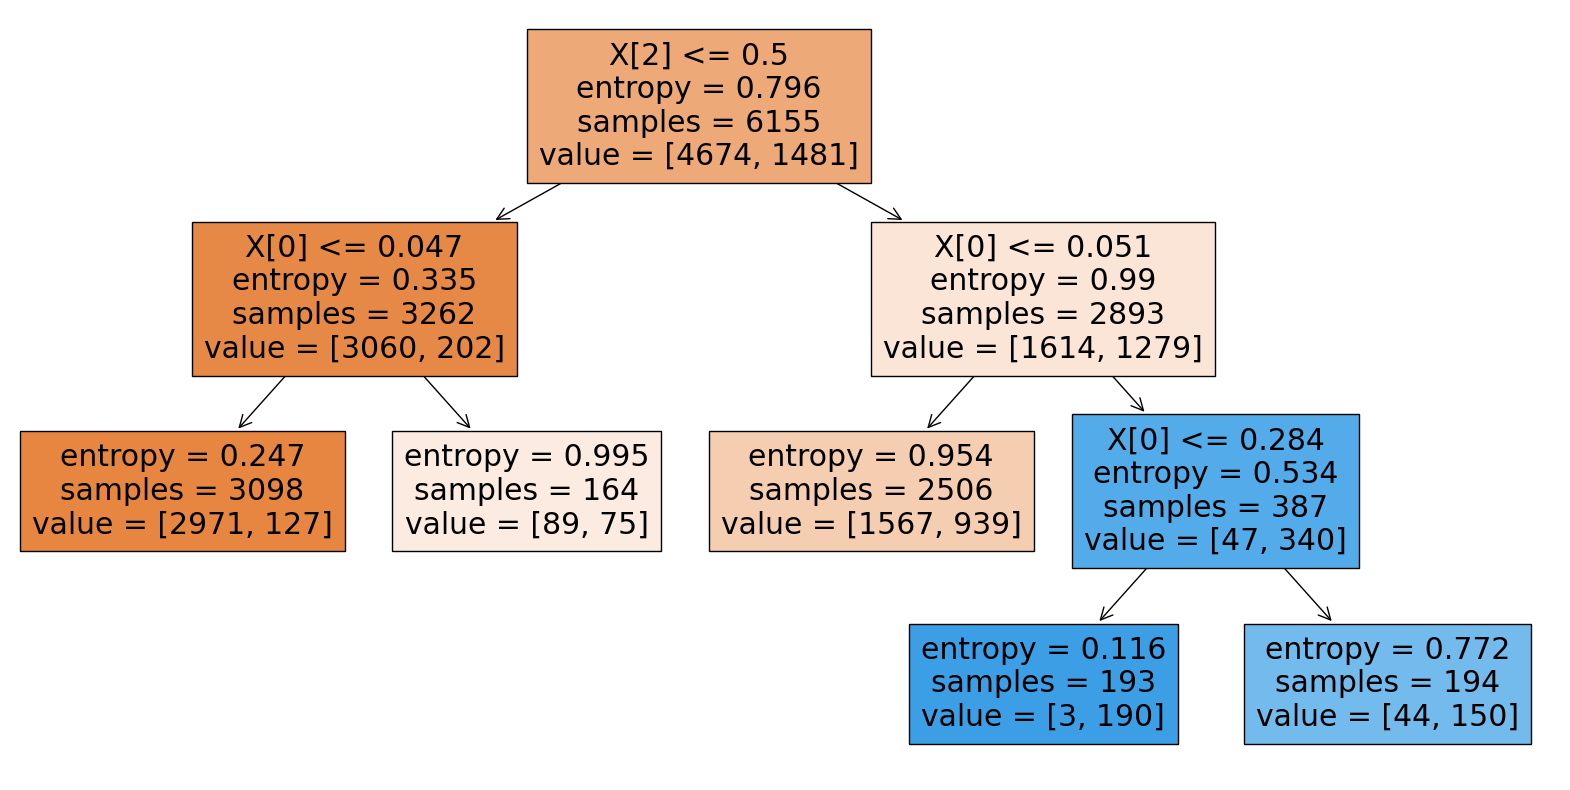

In [36]:
#Visualize the decision tree using the plot_tree function:
plt.figure(figsize=(20,10))
plot_tree(c50_01, filled=True)
plt.show()

In [ ]:
%%R 
## this packages did not work in jupyterLAB so i run this code in Rstudio and it work and i will provid the out put 
install.packages("C50")
library(C50)
dft <- read.csv("adult_ch6_training.csv")
head(dft)
colnames(dft)[1] <- "maritalStatus"
dft$Income <- as.factor(dft$Income)  # Convert the outcome variable to a factor variable
C5 <- C5.0(formula = Income ~ maritalStatus + Cap_Gains_Losses, data = dft, control = C5.0Control(minCases=75))
X <- dft[, c("maritalStatus", "Cap_Gains_Losses")]
predict(object = C5, newdata = X)
plot(C5)

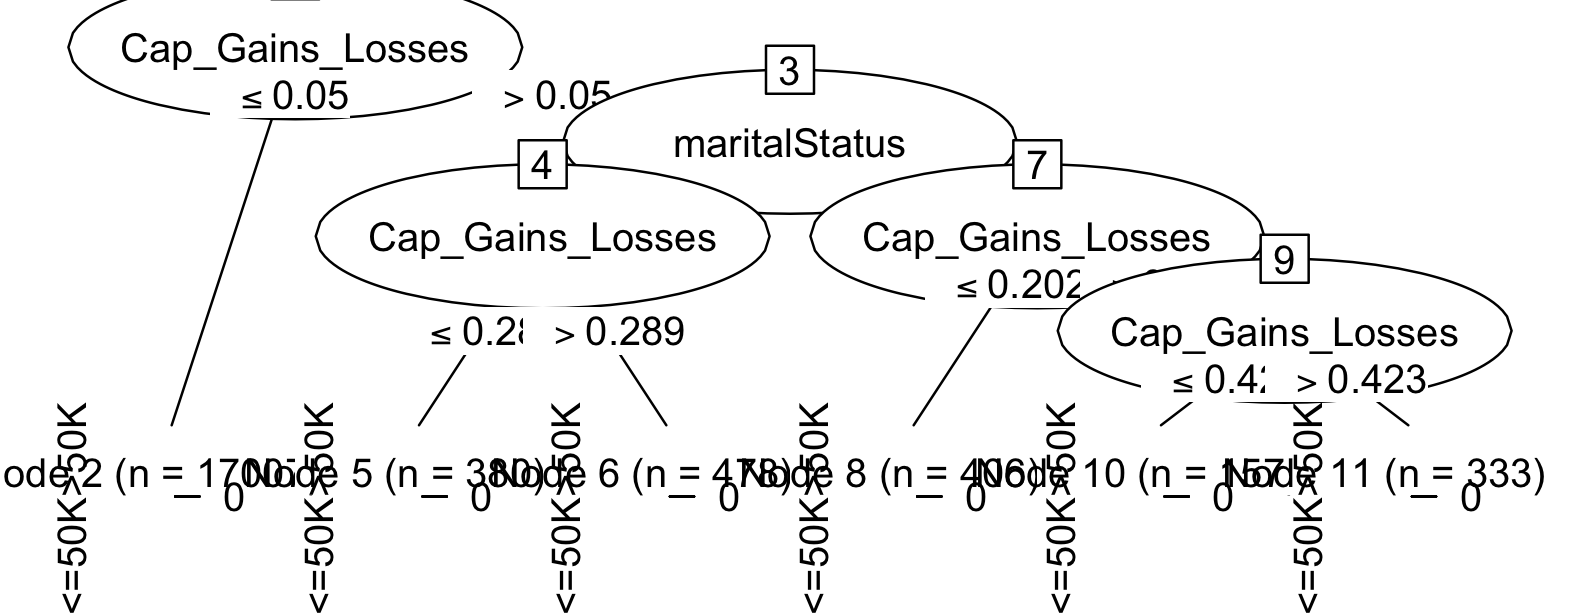!


# 17. How does your C5.0 model compare to the CART model? Describe the similarities and differences.
##### Similarities:

* Both C5.0 and CART are decision tree algorithms used for analyzing data.
* They both split the data into groups and can be used for classification and regression problems.
* They both use binary splits to create a tree structure and partition the feature space.
##### Differences:

* C5.0 is an advanced version of CART with additional features like boosting and variable weighting.
* They use different methods to create the splits.

### PAGE 165
#### For the following exercises, work with the bank_reg_training and the bank_reg_test data sets. Use either Python or R to solve each problem.


In [37]:
df = pd.read_csv("bank_reg_test.csv")
dft = pd.read_csv("bank_reg_training.csv")


### 34. Use the training set to run a regression predicting Credit Score, based on Debt‐to‐Income Ratio and Request Amount. Obtain a summary of the model. Do both predictors belong in the model?


##### Do both predictors. in the model ?
    Answer: No because the R sqaure is 0.028.

In [38]:
X = pd.DataFrame(dft[['Debt-to-Income Ratio', 'Request Amount']])
y = pd.DataFrame(dft[['Credit Score']])
X = sm.add_constant(X)
model01 = sm.OLS(y, X).fit()
model01.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Credit Score   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     156.2
Date:                Tue, 14 Mar 2023   Prob (F-statistic):           1.37e-67
Time:                        21:50:15   Log-Likelihood:                -59972.
No. Observations:               10693   AIC:                         1.199e+05
Df Residuals:                   10690   BIC:                         1.200e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  668.4562      1.336    500.275      0.000     665.837     671.075
Debt-to-Income Ratio   -48.1262      4.785    -10.058      0.000     -57.505     -38.747
Request Amount           0.0011   6.84e-05     15.727      0.000       0.001       0.001
==============================================================================
Omnibus:                     1658.575   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2844.250
Skew:                          -1.021   Prob(JB):                         0.00
Kurtosis:                       4.487   Cond. No.                     1.24e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
%%R 
df <- read.csv("bank_reg_test.csv")
dft <- read.csv("bank_reg_training.csv")
colnames(dft)[3]<- 'DebtIncomeRatio'
colnames(dft)[5]<- 'RequestAmount'


In [40]:
%%R
model01 <- lm(formula = Credit.Score ~ DebtIncomeRatio + RequestAmount, data = dft)
summary(model01)


Call:
lm(formula = Credit.Score ~ DebtIncomeRatio + RequestAmount, 
    data = dft)

Residuals:
    Min      1Q  Median      3Q     Max 
-279.13  -25.11   10.87   39.93  175.32 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      6.685e+02  1.336e+00  500.27   <2e-16 ***
DebtIncomeRatio -4.813e+01  4.785e+00  -10.06   <2e-16 ***
RequestAmount    1.075e-03  6.838e-05   15.73   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 66 on 10690 degrees of freedom
Multiple R-squared:  0.02839,	Adjusted R-squared:  0.02821 
F-statistic: 156.2 on 2 and 10690 DF,  p-value: < 2.2e-16



# 35. Validate the model from the previous exercise.

In [41]:
#i could not understand the question so i just run it with test data 
X = pd.DataFrame(df[['Debt-to-Income Ratio', 'Request Amount']])
y = pd.DataFrame(df[['Credit Score']])
X = sm.add_constant(X)
model01 = sm.OLS(y, X).fit()
model01.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Credit Score   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     215.4
Date:                Tue, 14 Mar 2023   Prob (F-statistic):           1.94e-92
Time:                        21:50:15   Log-Likelihood:                -60395.
No. Observations:               10775   AIC:                         1.208e+05
Df Residuals:                   10772   BIC:                         1.208e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  665.4987      1.328    501.265      0.000     662.896     668.101
Debt-to-Income Ratio   -52.1374      4.826    -10.803      0.000     -61.597     -42.677
Request Amount           0.0013   6.85e-05     19.013      0.000       0.001       0.001
==============================================================================
Omnibus:                     1792.693   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3194.120
Skew:                          -1.067   Prob(JB):                         0.00
Kurtosis:                       4.600   Cond. No.                     1.25e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.25e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
%%R
model01 <- lm(formula = Credit.Score ~ Debt.to.Income.Ratio + Request.Amount, data = df)
summary(model01)


Call:
lm(formula = Credit.Score ~ Debt.to.Income.Ratio + Request.Amount, 
    data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-288.16  -24.49   11.08   39.47  199.84 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           6.655e+02  1.328e+00  501.26   <2e-16 ***
Debt.to.Income.Ratio -5.214e+01  4.826e+00  -10.80   <2e-16 ***
Request.Amount        1.302e-03  6.849e-05   19.01   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 65.78 on 10772 degrees of freedom
Multiple R-squared:  0.03845,	Adjusted R-squared:  0.03827 
F-statistic: 215.4 on 2 and 10772 DF,  p-value: < 2.2e-16



## 36. Use the regression equation to complete this sentence: “The estimated Credit Score equals....”
### Answer: 
### The training data, the estimated Credit Score = x( -48.1262)+ y( 0.0011)+ 668.4562  
*  x = Debt-to-Income Ratio
*  y = Request Amount
### The test data, the estimated Credit Score = x( -52.1374)+ y( 0.0013)+ 665.4987  
*  x = Debt-to-Income Ratio
*  y = Request Amount


# 37. Interpret the coefficient for Debt‐to‐Income Ratio.
### Answer for training data:
     The coefficient for Debt-to-Income Ratio in my linear regression model for  test data  is -48.1262 which means that as the Debt-to-Income Ratio increases, the predicted credit score decreases. Specifically, for each one-unit increase in the Debt-to-Income Ratio, the predicted credit score decreases by 48.1262 units.
### Answer for test data:
     The coefficient for Debt-to-Income Ratio in my linear regression model for  test data  is -52.1374 which means that as the Debt-to-Income Ratio increases, the predicted credit score decreases. Specifically, for each one-unit increase in the Debt-to-Income Ratio, the predicted credit score decreases by 52.1374 units.


# 38. Interpret the coefficient for Request Amount.
### Answer for training data:
     The coefficient for Request Amount Ratio in my linear regression model for  test data  is 0.0011 which means that as the Request Amount increases, the predicted credit score decreases. Specifically, for each one-unit increase in the Request Amount, the predicted credit score increases by 0.0011 units.
### Answer for test data:
     The coefficient for Request Amount Ratio in my linear regression model for  test data  is 0.0013 which means that as the Request Amount Ratio increases, the predicted credit score decreases. Specifically, for each one-unit increase in the Request Amount, the predicted credit score increases by 0.0013 units.

# 39. Find and interpret the value of s.
### Answer for training
    "s" is 66, it tells us how much the data points differ from the predicted values in a linear regression analysis with 10690 degrees of freedom. A smaller "s" means a better fit, and a larger "s" means a worse fit.
### Answer for test
    The value of "s" is 65.78, and it represents the residual standard error (RSE) in a linear regression analysis using 10772 degrees of freedom. The RSE measures the variability of the residuals in the model, and a smaller value of "s" indicates a better fit of the model to the data.


# 40. Find and interpret R2 . Comment. adj
### Answer for training
    Multiple R-squared:  0.02839,	Adjusted R-squared:  0.02821 
    The R-squared value is 0.02839, indicating that only about 2.8% of the variation in the dependent variable is explained by the independent variable(s) in the multiple linear regression model. The adjusted R-squared is similar at 0.02821, indicating that the model is not a good fit for the data and the independent variable(s) have very little explanatory power over the dependent variable.
    
### Answer for test
    Multiple R-squared:  0.03845,	Adjusted R-squared:  0.03827
    The Multiple R-squared is 0.03845, indicating that only about 3.8% of the variation in the dependent variable is explained by the independent variable(s) in the multiple linear regression model. The Adjusted R-squared is 0.03827 and is similar to the R-squared value, suggesting that the model is not a good fit for the data and the independent variable(s) have very little explanatory power over the dependent variable.
    


# 41. Find MAEBaseline and MAERegression, and determine whether the regression model outperformed its baseline model.

In [43]:
#for the test data 
# Calculate the MAE for the baseline model
MAEBaseline = df['Credit Score'].mean()
print("MAEBaseline =", MAEBaseline)
# Fit a linear regression model
model01 = LinearRegression().fit(df[['Debt-to-Income Ratio', 'Request Amount']], df['Credit Score'])
# Generate predicted values based on the model
predicted = model01.predict(df[['Debt-to-Income Ratio', 'Request Amount']])
# Calculate the MAE for the regression model
MAERegression = mean_absolute_error(df['Credit Score'], predicted)
print("MAERegression =", MAERegression)

MAEBaseline = 673.3147099767981
MAERegression = 48.01625111756104


In [44]:
%%R
#for the training data 
# Calculate the mean credit score in the dataset
MAEBaseline <- mean(dft$Credit.Score)
# Print the baseline MAE
print(paste("MAEBaseline =", MAEBaseline))
# Fit a linear regression model to the dataset
model01 <- lm(formula = Credit.Score ~ DebtIncomeRatio + RequestAmount, data = dft)
# Generate predicted values based on the model
predicted <- predict(model01, dft)
# Calculate the MAE for the linear regression model
MAERegression <- mean(abs(dft$Credit.Score - predicted))
# Print the regression model MAE
print(paste("MAERegression =", MAERegression))

[1] "MAEBaseline = 674.061535584027"
[1] "MAERegression = 48.3096156905911"
